In [34]:
import os

import pandas as pd

DATA_DIR = "data"
DATA_FILENAME = "data.csv"

df = pd.read_csv(os.path.join(DATA_DIR, DATA_FILENAME))
df.head()

,model,pr_best,mu_0,n_policies,selected_best,sim_no
0,projection,0.1717,0.05,10,False,0
1,bootstrap,0.3923,0.05,10,False,0
2,projection,0.1511,0.05,20,False,0
3,bootstrap,0.4479,0.05,20,False,0
4,projection,0.0368,0.05,50,False,0


In [35]:
df.groupby(["mu_0", "n_policies", "model"])[["pr_best", "selected_best"]].mean()

pr_best  selected_best
mu_0 n_policies model                              
0.05 10         bootstrap   0.435864          0.098
                projection  0.230224          0.098
     20         bootstrap   0.351548          0.061
                projection  0.121910          0.061
     50         bootstrap   0.272623          0.024
                projection  0.053827          0.024
0.10 10         bootstrap   0.428757          0.113
                projection  0.223573          0.113
     20         bootstrap   0.348466          0.059
                projection  0.119059          0.059
     50         bootstrap   0.282723          0.028
                projection  0.058273          0.028
0.15 10         bootstrap   0.438966          0.130
                projection  0.233712          0.130
     20         bootstrap   0.351384          0.062
                projection  0.116729          0.062
     50         bootstrap   0.272925          0.026
                projection  0.054959          0.026
0.20 10         bootstrap   0.434090          0.128
                projection  0.230141          0.128
     20         bootstrap   0.353326          0.058
                projection  0.119567          0.058
     50         bootstrap   0.278575          0.029
                projection  0.055886          0.029

In [71]:
df = df.sort_values("pr_best", ascending=False).reset_index(drop=True)
df.head()

,model,pr_best,mu_0,n_policies,selected_best,sim_no,cum_selected_best,cum_simulations,cum_selected_best_pct
0,bootstrap,0.9821,0.15,10,False,548,130,1000.0,0.130000
1,bootstrap,0.9701,0.20,10,False,466,128,1000.0,0.128000
2,bootstrap,0.9665,0.05,10,False,137,98,1000.0,0.098000
3,bootstrap,0.9632,0.20,10,False,96,128,999.0,0.128128
4,projection,0.9604,0.15,10,False,548,130,1000.0,0.130000


In [72]:
gb = df.groupby(["model", "mu_0", "n_policies"])
df["cum_selected_best"] = gb.selected_best.transform(lambda x: np.cumsum(x))
df.head()

,model,pr_best,mu_0,n_policies,selected_best,sim_no,cum_selected_best,cum_simulations,cum_selected_best_pct
0,bootstrap,0.9821,0.15,10,False,548,0,1000.0,0.130000
1,bootstrap,0.9701,0.20,10,False,466,0,1000.0,0.128000
2,bootstrap,0.9665,0.05,10,False,137,0,1000.0,0.098000
3,bootstrap,0.9632,0.20,10,False,96,0,999.0,0.128128
4,projection,0.9604,0.15,10,False,548,0,1000.0,0.130000


In [73]:
df["cum_simulations"] = gb.selected_best.transform(lambda x: np.cumsum(np.ones(shape=x.shape)))
df.head()

,model,pr_best,mu_0,n_policies,selected_best,sim_no,cum_selected_best,cum_simulations,cum_selected_best_pct
0,bootstrap,0.9821,0.15,10,False,548,0,1.0,0.130000
1,bootstrap,0.9701,0.20,10,False,466,0,1.0,0.128000
2,bootstrap,0.9665,0.05,10,False,137,0,1.0,0.098000
3,bootstrap,0.9632,0.20,10,False,96,0,2.0,0.128128
4,projection,0.9604,0.15,10,False,548,0,1.0,0.130000


In [74]:
df["cum_selected_best_pct"] = df.cum_selected_best / df.cum_simulations
df.head()

,model,pr_best,mu_0,n_policies,selected_best,sim_no,cum_selected_best,cum_simulations,cum_selected_best_pct
0,bootstrap,0.9821,0.15,10,False,548,0,1.0,0.0
1,bootstrap,0.9701,0.20,10,False,466,0,1.0,0.0
2,bootstrap,0.9665,0.05,10,False,137,0,1.0,0.0
3,bootstrap,0.9632,0.20,10,False,96,0,2.0,0.0
4,projection,0.9604,0.15,10,False,548,0,1.0,0.0


<ipython-input-118-6f59ae56d88e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["pr_best"] = selected_df["pr_best"] / 2


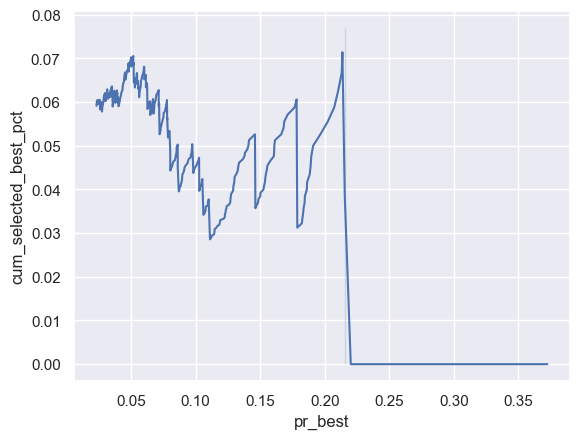

In [118]:
selected_df = df[(df.model == "projection") & (df.mu_0 == .1) & (df.n_policies == 20)]
selected_df["pr_best"] = selected_df["pr_best"] / 2
sns.lineplot(data=selected_df, x="pr_best", y="cum_selected_best_pct")
plt.show()

In [119]:
threshold = .1
selected_df[selected_df.pr_best > threshold].selected_best.mean()

0.045454545454545456

In [120]:
(selected_df.pr_best > threshold).sum()

132

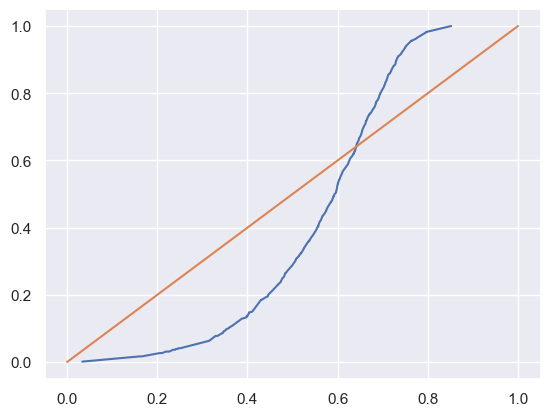

In [37]:
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

bootstrap_df = df[(df.model == "bootstrap") & (df.mu_0 == .05) & (df.n_policies == 10)]
fpr, tpr, thresholds = roc_curve(bootstrap_df.selected_best, bootstrap_df.pr_best)
fpr, thresholds = fpr[thresholds <= 1], thresholds[thresholds <= 1]
sns.lineplot(x=1-thresholds, y=fpr)
sns.lineplot(x=np.linspace(0, 1), y=np.linspace(0, 1))
plt.show()

In [48]:
bootstrap_df[bootstrap_df.pr_best > .7].selected_best.mean()

0.16071428571428573

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(bootstrap_df.selected_best, bootstrap_df.pr_best>.2, normalize="true")

array([[0.01552106, 0.98447894],
       [0.        , 1.        ]])